<a href="https://colab.research.google.com/github/kellytog/BI/blob/main/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#se procede con la implementacion del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nxl='/content/drive/MyDrive/ANALITICA DE NEGOCIOS/3. BD2-HeartData_M_Int.xlsx'


#primero se seleccionan las variables y luego se usa el dropna
XDB=pd.read_excel(nxl, sheet_name=0)
XDB=XDB[['Age','Systolic','Diastolic','BMI','Disease']]
XDB=XDB.dropna()
display(XDB)

#Para mirar correlaciones y variables importantes
sns.pairplot(XDB,hue='Disease',size=4, vars=['Age','Systolic','Diastolic','BMI'])
plt.show()
#cada fila respresenta una variable, preapr es la linea diagonal, la que tiene mayor separacion respecto a preapr es la mejor para describir la prearp en este caso es ingreesos, se hace vertical y horizontal, donde se encuentren algunas variables quiere decir que es la correlacion entre ellas


#Para conocer las correlaciones exactas:
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()
#el color mas naranjado son las  si una variable aumenta la otra aumenta en igual medida, esto significa que la variable es capaz de explicar correctamente ese %


**DESCRIPCION DE LOS DATOS**
Age
Representa la edad del paciente en años.
Puede ayudar a identificar si existe un grupo con mayor riesgo de enfermedad cardíaca.

Systolic
Mide la presión arterial máxima cuando el corazón se contrae.
Valores elevados pueden ser un indicador de riesgo de enfermedades cardíacas.

Diastolic
Representa la presión arterial mínima cuando el corazón está en reposo.
Se usa junto con la presión sistólica para diagnosticar problemas cardiovasculares.

BMI
Relación entre peso y altura del paciente.
Se utiliza para determinar si una persona tiene sobrepeso u obesidad.

Disease
Variable objetivo del análisis (1 = Tiene enfermedad cardíaca, 0 = No tiene enfermedad cardíaca).
Permite clasificar a los individuos según su estado de salud y validar la precisión del modelo predictivo.

In [ ]:
XD=np.array(XDB[['Age','Systolic','Diastolic','BMI']])
yd=np.array(XDB[['Disease']])

#SE CREAN LA CANTIDAD DE PERFILES DE CREDITO 5 categorias (alto, muy alto, bajo, muy bajo, medio)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc, random_state=42) #aqui le estoy diciendo que tome los numeros aleatorios pero siempre ponemos 42 para que sean iguales
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n", centroids)
#crea 5 montones de datos clusters 1 cluster personas de 41 años, ingresos 242 egresos 213 y monto de 175, y asi se leen todos

#como quedaron clasificadas las personas
labels=mkm.labels_
print("Los labels son:\n", labels)
XDB['labels']=labels #adicione a la tabla el cluster al que pertence un solicitante, el cluster 1 es del label 3
display(XDB)

#identificar cuales que quedaron en cierto label fueron aprobado o negados
#caracterizamos los centroides
ND=np.bincount(labels)
print("l tamaño de los clusters es:\n",ND)
#EN CADA CLUSTER QUEDAN ASI 1:2127  2:264  3:485  4:960 5:2006 ESTAS SON LAS CANTIDADES DE PERSONAS POR CLUSTER
NApr=XDB.groupby('labels').agg({"Disease":lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({"Disease":lambda x:(x==0).sum()})
print("el numero de enfermos por cluster es:\n",NApr)
print("el numero de no enfermos por cluster es:\n",NNeg)


#se procede con los porcentajes de preaprobacion
NApr['Disease']=NApr['Disease']/ND
NNeg['Disease']=NNeg['Disease']/ND
print("el porcentaje de enfermos por cluster es:\n",NApr)
print("el porcentaje de no enfermos por cluster es:\n",NNeg)

Los centroides son:
 [[ 39.36111111 113.30555556  74.5         26.63888889]
 [ 57.90697674 126.74418605  84.37209302  30.34883721]
 [ 44.68965517 139.93103448 114.75862069  26.55172414]
 [ 37.35294118 143.76470588  77.76470588  28.91176471]
 [ 44.63157895 111.76315789 109.36842105  28.76315789]]
Los labels son:
 [4 1 1 2 2 3 1 1 1 2 4 2 3 0 2 0 0 3 1 3 2 1 0 3 3 2 3 3 1 0 3 4 0 3 1 1 1
 0 2 4 4 3 1 0 0 3 2 0 3 1 0 2 0 1 0 3 0 4 0 3 1 1 4 4 0 4 4 0 1 4 3 4 1 1
 0 1 2 1 4 2 0 3 0 1 1 0 4 1 1 3 2 4 4 3 1 1 0 1 3 2 4 4 2 0 4 2 1 2 0 3 2
 4 3 3 4 0 0 3 4 2 4 4 1 4 4 2 1 1 4 4 1 1 3 1 3 1 3 0 0 1 4 4 0 1 4 1 0 3
 1 3 3 4 1 2 0 3 4 2 1 4 2 2 4 2 0 4 2 2 0 3 2 3 2 0 4 0 4 0 1 3]


,Age,Systolic,Diastolic,BMI,Disease,labels
0,44,112,111,17,0,4
1,55,128,90,27,1,1
2,47,131,94,26,1,1
3,31,151,104,17,0,2
4,65,148,117,17,1,2
...,...,...,...,...,...,...
175,43,119,76,25,0,0
176,63,107,113,40,1,4
177,47,116,61,27,0,0
178,70,110,88,24,0,1


l tamaño de los clusters es:
 [36 43 29 34 38]
el numero de enfermos por cluster es:
         Disease
labels         
0            16
1            36
2            18
3            10
4            27
el numero de no enfermos por cluster es:
         Disease
labels         
0            20
1             7
2            11
3            24
4            11
el porcentaje de enfermos por cluster es:
          Disease
labels          
0       0.444444
1       0.837209
2       0.620690
3       0.294118
4       0.710526
el porcentaje de no enfermos por cluster es:
          Disease
labels          
0       0.555556
1       0.162791
2       0.379310
3       0.705882
4       0.289474


In [ ]:
ydp=np.zeros((len(XD),1))
Vapr=np.array(NApr); Vneg=np.array(NNeg)

for k in range(len(XD)):
  napr=labels[k]
  #print(napr)
  #print("la persona:",k)
  #print("el cluster alque pertenece es:",napr)
  #print("el porcentaje de posible enfermedad es:",Vapr[napr])
  #print("el porcentaje de no estar enfermo es:",Vneg[napr])

#consolidamos los preapr y los preneg
  if Vapr[napr]>Vneg[napr]:
    ydp[k]=1
  else:
    ydp[k]=0


#se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("la matriz de confusion es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
exactitud=(VN+VP)/(VN+FP+FN+VP)
sensibilidad=VP/(VP+FN)
especificidad=VN/(VN+FP)
precision=VP/(VP+FP)
tasadeerror=(FP+FN)/(VN+FP+FN+VP)
predNega=VN/(VN+FN)

print("la exactitud es:",exactitud)
print("la sensibilidad es:",sensibilidad)
print("la especificidad es:",especificidad)
print("la precision es:",precision)
print("la tasa de error es:",tasadeerror)
print("la probabilidad de preaprobacion es:",predNega)


la matriz de confusion es:
 [[44 29]
 [26 81]]
la exactitud es: 0.6944444444444444
la sensibilidad es: 0.7570093457943925
la especificidad es: 0.6027397260273972
la precision es: 0.7363636363636363
la tasa de error es: 0.3055555555555556
la probabilidad de preaprobacion es: 0.6285714285714286


la persona pertence al cluster: [3]
el procentaje de posible enfermedad es: [[0.29411765]]
el procentaje de no enfermedad es: [[0.70588235]]


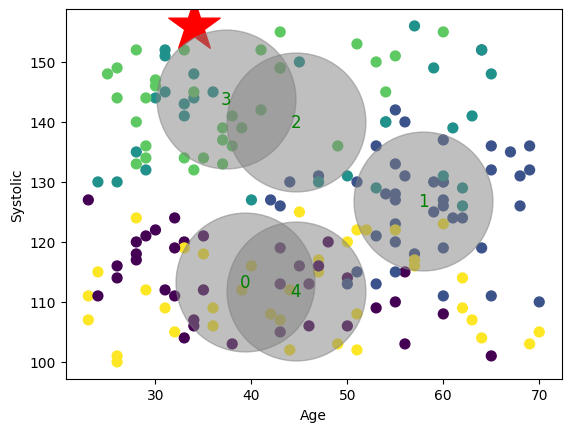

In [ ]:
XDn= np.array([(34,156,82,33)])
ydn=mkm.predict(XDn)
print("la persona pertence al cluster:",mkm.predict(XDn))
print("el procentaje de posible enfermedad es:",Vapr[ydn])
print("el procentaje de no enfermedad es:",Vneg[ydn])

plt.scatter(XD[:,0],XD[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(XDn[:,0],XDn[:,1],marker='*',s=1500,facecolors='red')
plt.scatter(centroids[:,0],centroids[:,1],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i,c in enumerate(centroids):
  plt.text(c[0],c[1],str(i),fontsize=12,color='green',ha='center',va='center')

plt.xlabel('Age')
plt.ylabel('Systolic')
plt.show()

**ANALISIS DE RESULTADOS**

Para el analisis de resultados de este modelo tuvimos unas variables de entrada denominadas 'Age','Systolic','Diastolic','BMI' y como variable de salida tenemos a 'Disease', esta ultima será la variable explicativa para definir los resultados del modelo. Para este modelo, se definieron 5 clusters con el objetivo de segmentar a los pacientes en diferentes grupos de riesgo según sus características clínicas.
En función de la cantidad de datos que cada cluster agrupó, se encontró que la variable con mayor relevancia respecto a la presencia de 'disease' fue la variable BMI, con una correlación cercana al 38%.
La base de datos en total, cuenta con 180 datos repartidos entre los clusters 0,1,2,3,4 donde tamaño de los clusters es:36 43 29 34 38 respectivamente,segun el analisis, aproximadamente 60% de los pacientes tienen o tendran enfermedades cardiacas y que los promedios de cada cluster son:
cluster 0: age 39.36111111 Systolic 113.30555556  Diastolic 74.5 BMI 26.63888889
cluster 1: 57.90697674 126.74418605  84.37209302  30.34883721
cluster 2: 44.68965517 139.93103448 114.75862069  26.55172414
cluster 3: 37.35294118 143.76470588  77.76470588  28.91176471
cluster 4: 44.63157895 111.76315789 109.36842105  28.76315789
donde el cluster 1 tiene el mayor promedio de edad (57), el cluster 3 en systolic (113), el cluster 2 el mayor diastolic (114) y el cluster 1 mayor BMI (30).
Es importante resaltar la exactitud alcanzada por el modelo fue cercana al 69% en promedio (0.6944), lo que indica un buen desempeño general en la clasificación de los datos. Con respecto a la predicción de enfermedad cardíaca, el modelo alcanzó una sensibilidad del 75%, lo que indica su capacidad para identificar correctamente a los pacientes enfermos. Sin embargo, frente a la clasificación de individuos sanos, el modelo obtuvo una especificidad del 60%, lo que sugiere una ligera tendencia a clasificar a los pacientes como enfermos.

Finalmente, para la predicción de un nuevo paciente con características [Age=34, Systolic=156, Diastolic=82, BMI=33], el modelo lo asignó al cluster 3, con un 29% de probabilidad de tener una enfermedad cardíaca y un 70% de no probabilidad